# Homework 1 Ahmet Akman
This notebook will consist the efforts led by homework 1 and done by Ahmet Akman in the scope of EE449 Course

## Imports

In [1]:
import numpy as np
import sklearn
import torch
import matplotlib.pyplot as plt

## Basic Neural Network Construction and Training


### 1.1




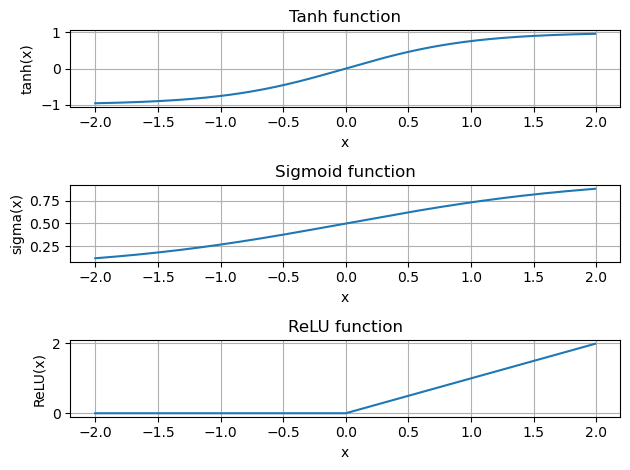

In [2]:
x = np.arange(-2, 2, 0.01, dtype = float)
tanh_result = (np.exp(2*x)-1) / (np.exp(2*x)+1)
sigmoid_result =  1 / (np.exp(-x)+1)
ReLU_result = np.maximum(0,x)


fig, ax = plt.subplots(3)
ax[0].plot(x,tanh_result)
ax[0].set_title("Tanh function")
ax[0].set_xlabel("x")
ax[0].set_ylabel("tanh(x)")
ax[0].grid()

ax[1].plot(x,sigmoid_result)
ax[1].set_title("Sigmoid function")
ax[1].set_xlabel("x")
ax[1].set_ylabel("sigma(x)")
ax[1].grid()

ax[2].plot(x,ReLU_result)
ax[2].set_title("ReLU function")
ax[2].set_xlabel("x")
ax[2].set_ylabel("ReLU(x)")
ax[2].grid()
fig.tight_layout()


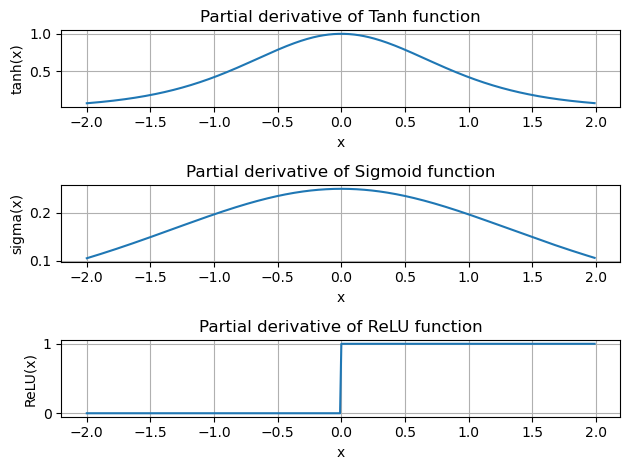

In [3]:
p_tanh_result = 1- (np.exp(x)-np.exp(-x))**2 / (np.exp(x) + np.exp(-x))**2
p_sigmoid_result =  np.exp(-x) / (np.exp(-x)+1)**2
p_ReLU_result = x >= 0 


fig, ax = plt.subplots(3)
ax[0].plot(x, p_tanh_result)
ax[0].set_title("Partial derivative of Tanh function")
ax[0].set_xlabel("x")
ax[0].set_ylabel("tanh(x)")
ax[0].grid()

ax[1].plot(x, p_sigmoid_result)
ax[1].set_title("Partial derivative of Sigmoid function")
ax[1].set_xlabel("x")
ax[1].set_ylabel("sigma(x)")
ax[1].grid()

ax[2].plot(x, p_ReLU_result)
ax[2].set_title("Partial derivative of ReLU function")
ax[2].set_xlabel("x")
ax[2].set_ylabel("ReLU(x)")
ax[2].grid()
fig.tight_layout()

### 1.2


Epoch 0: Loss = 10.707
Epoch 1000: Loss = 0.063
Epoch 2000: Loss = 0.054
Epoch 3000: Loss = 0.072
Epoch 4000: Loss = 0.036
Epoch 5000: Loss = 0.032
Epoch 6000: Loss = 0.036
Epoch 7000: Loss = 0.046
Epoch 8000: Loss = 0.045
Epoch 9000: Loss = 0.044
97.0 % of test examples classified correctly.


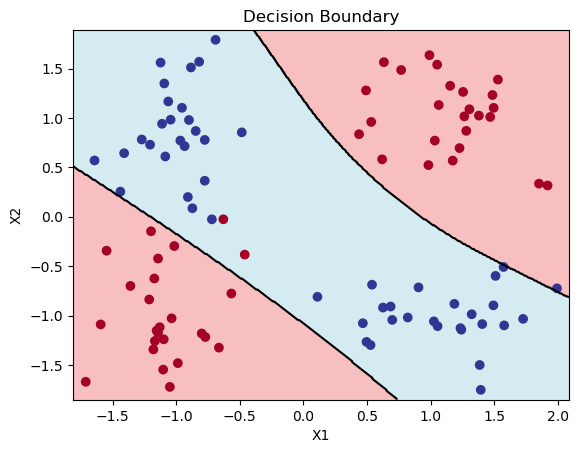

In [20]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return np.exp(x) / (np.exp(x)+1)
    def sigmoid_derivative(self, x):
        return np.exp(-x) / (np.exp(-x)+1)**2

    def forward(self, inputs):
        # Forward pass through the network
        self.hidden_output =  self.sigmoid(np.dot(inputs, self.weights_input_hidden) + self.bias_hidden)
        self.output =  np.round(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output
    
    def backward(self, inputs, targets, learning_rate):
        # Backward pass through the network
        # Compute error
        output_error = targets - self.output
        hidden_error = output_error * self.sigmoid_derivative(self.hidden_output)
        # Compute gradients
        output_delta = output_error * self.sigmoid_derivative(self.output)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)
        # Update weights and biases
        self.weights_hidden_output = self.weights_hidden_output + learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output = self.bias_output + learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden = self.weights_input_hidden + learning_rate * np.dot(inputs.T, hidden_delta)
        self.bias_hidden = self.bias_hidden + learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

from utils import part1CreateDataset, part1PlotBoundary
x_train, y_train, x_val, y_val = part1CreateDataset(train_samples=1000, val_samples=100, std=0.4)

# Define neural network parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.001
# Create neural network
nn = MLP(input_size, hidden_size, output_size)
# Train the neural network
for epoch in range(10000):
    # Forward propagation
    output = nn.forward(x_train)
    # Backpropagation
    nn.backward(x_train, y_train, learning_rate)

    # Print the loss (MSE) every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean((y_train - output)**2)
        print(f'Epoch {epoch}: Loss = {loss}')

        
# Test the trained neural network
y_predict = nn.forward(x_val)
print(f'{np.mean(y_predict==y_val)*100} % of test examples classified correctly.')


part1PlotBoundary(x_val, y_val, nn)

## Implementing a Convolutional Layer with NumPy

## Experimenting ANN Architectures

## Experimenting Activation Functions

## Experimenting Learning Rate